<a href="https://colab.research.google.com/github/Janvi-Gupta/OIBSIP_Task3/blob/main/OIBSIP_T3(Car_Price_Prediction_With_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task #3 - Car Price Prediction With ML**
### Data Science Intern @ Oasis Infobyte - OIBSIP

---
<br>

### **Problem Statement:**  
- The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.
- Predict the price of the Car based on lots of factors.

### **Dataset:**
* #### https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars


### **Github:**
* #### https://github.com/Janvi-Gupta/OIBSIP_Task3/blob/main/OIBSIP_T3(Car_Price_Prediction_With_ML).ipynb

## `Author: Janvi Gupta`

## **Import Library**

In [126]:
#Used For Analysis and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Used for encoding the categorical data
from sklearn.preprocessing import LabelEncoder

#Used For training/testing, selecting and evaluating a Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## **Load data**

In [ ]:
#Read the dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.head(5)

## **Analyse the Data**

In [ ]:
# Dimensions of dataset in terms of columns and rows
df.shape

In [ ]:
# Information of all Columns
df.info()

In [ ]:
# Gives statistical summary of a numerical column.
df.describe()

In [ ]:
# Check null values in the dataset
df.isnull().sum()

In [ ]:
# Give the sum of duplicated data
df.duplicated().sum()

In [ ]:
# See the unique data of categorical columns
col = df.columns[df.dtypes == "object"]
for i in col:
  print(i,":", df[i].unique())

In [ ]:
# Correletion between features
df.corr()

In [117]:
# Remove Car_ID, symboling and CarName columns from dataset.
df = df.drop(columns=["car_ID","symboling","CarName"], axis=1)

In [ ]:
df

## **Data Cleaning and Visualization**

In [ ]:
# Distribution of price data
df["price"].plot.hist()

In [ ]:
# Chart of Price and Categorical Columns

fig = plt.figure(figsize=(17,7))
fig.suptitle('Visualiziling Categorical data with Price column')
plt.subplot(2,3,1)
plt.bar(df['fueltype'], df['price'], color="royalblue")
plt.xlabel("Fueltype")
plt.ylabel("Price")

plt.subplot(2,3,2)
plt.bar(df['enginelocation'], df['price'], color="orange")
plt.xlabel("Enginelocation")

plt.subplot(2,3,3)
plt.bar(df['fuelsystem'], df['price'], color="Brown")
plt.xlabel("fuelsystem")

plt.subplot(2,3,4)
plt.bar(df['doornumber'], df['price'], color="olive")
plt.xlabel("Doornumber")
plt.ylabel("Price")

plt.subplot(2,3,5)
plt.bar(df['cylindernumber'], df['price'], color="red")
plt.xlabel("Cylindernumber")

plt.subplot(2,3,6)
plt.bar(df['carbody'], df['price'], color="green")
plt.xlabel("carbody")

plt.show()

In [125]:
# Replace Categorical data to numerical data
df['doornumber'] = df['doornumber'].replace({"two":2,"four":4})
df['cylindernumber'] = df['cylindernumber'].replace({"four":4,"six":6,"five":5,"three":3,"twelve":12,"two":2,"eight":8})

In [ ]:
# Use LaberlEncoder to convert the data into numbers

for column in df.columns:
    if df[column].dtype == "object":
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

df.head()

In [ ]:
# Plot the chart of Correction between Columns
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr, annot=True, ax=ax, cmap="ocean")
plt.show()

In [ ]:
# Find the Outliers
column=['price','carlength','carwidth','curbweight','enginesize','horsepower']
cs = ['r','b','g','c','r','g']

count = 0
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=1)
for i in column:
  plt.subplot(1,7,count+1)
  df.boxplot(i,color=cs[count])
  count += 1

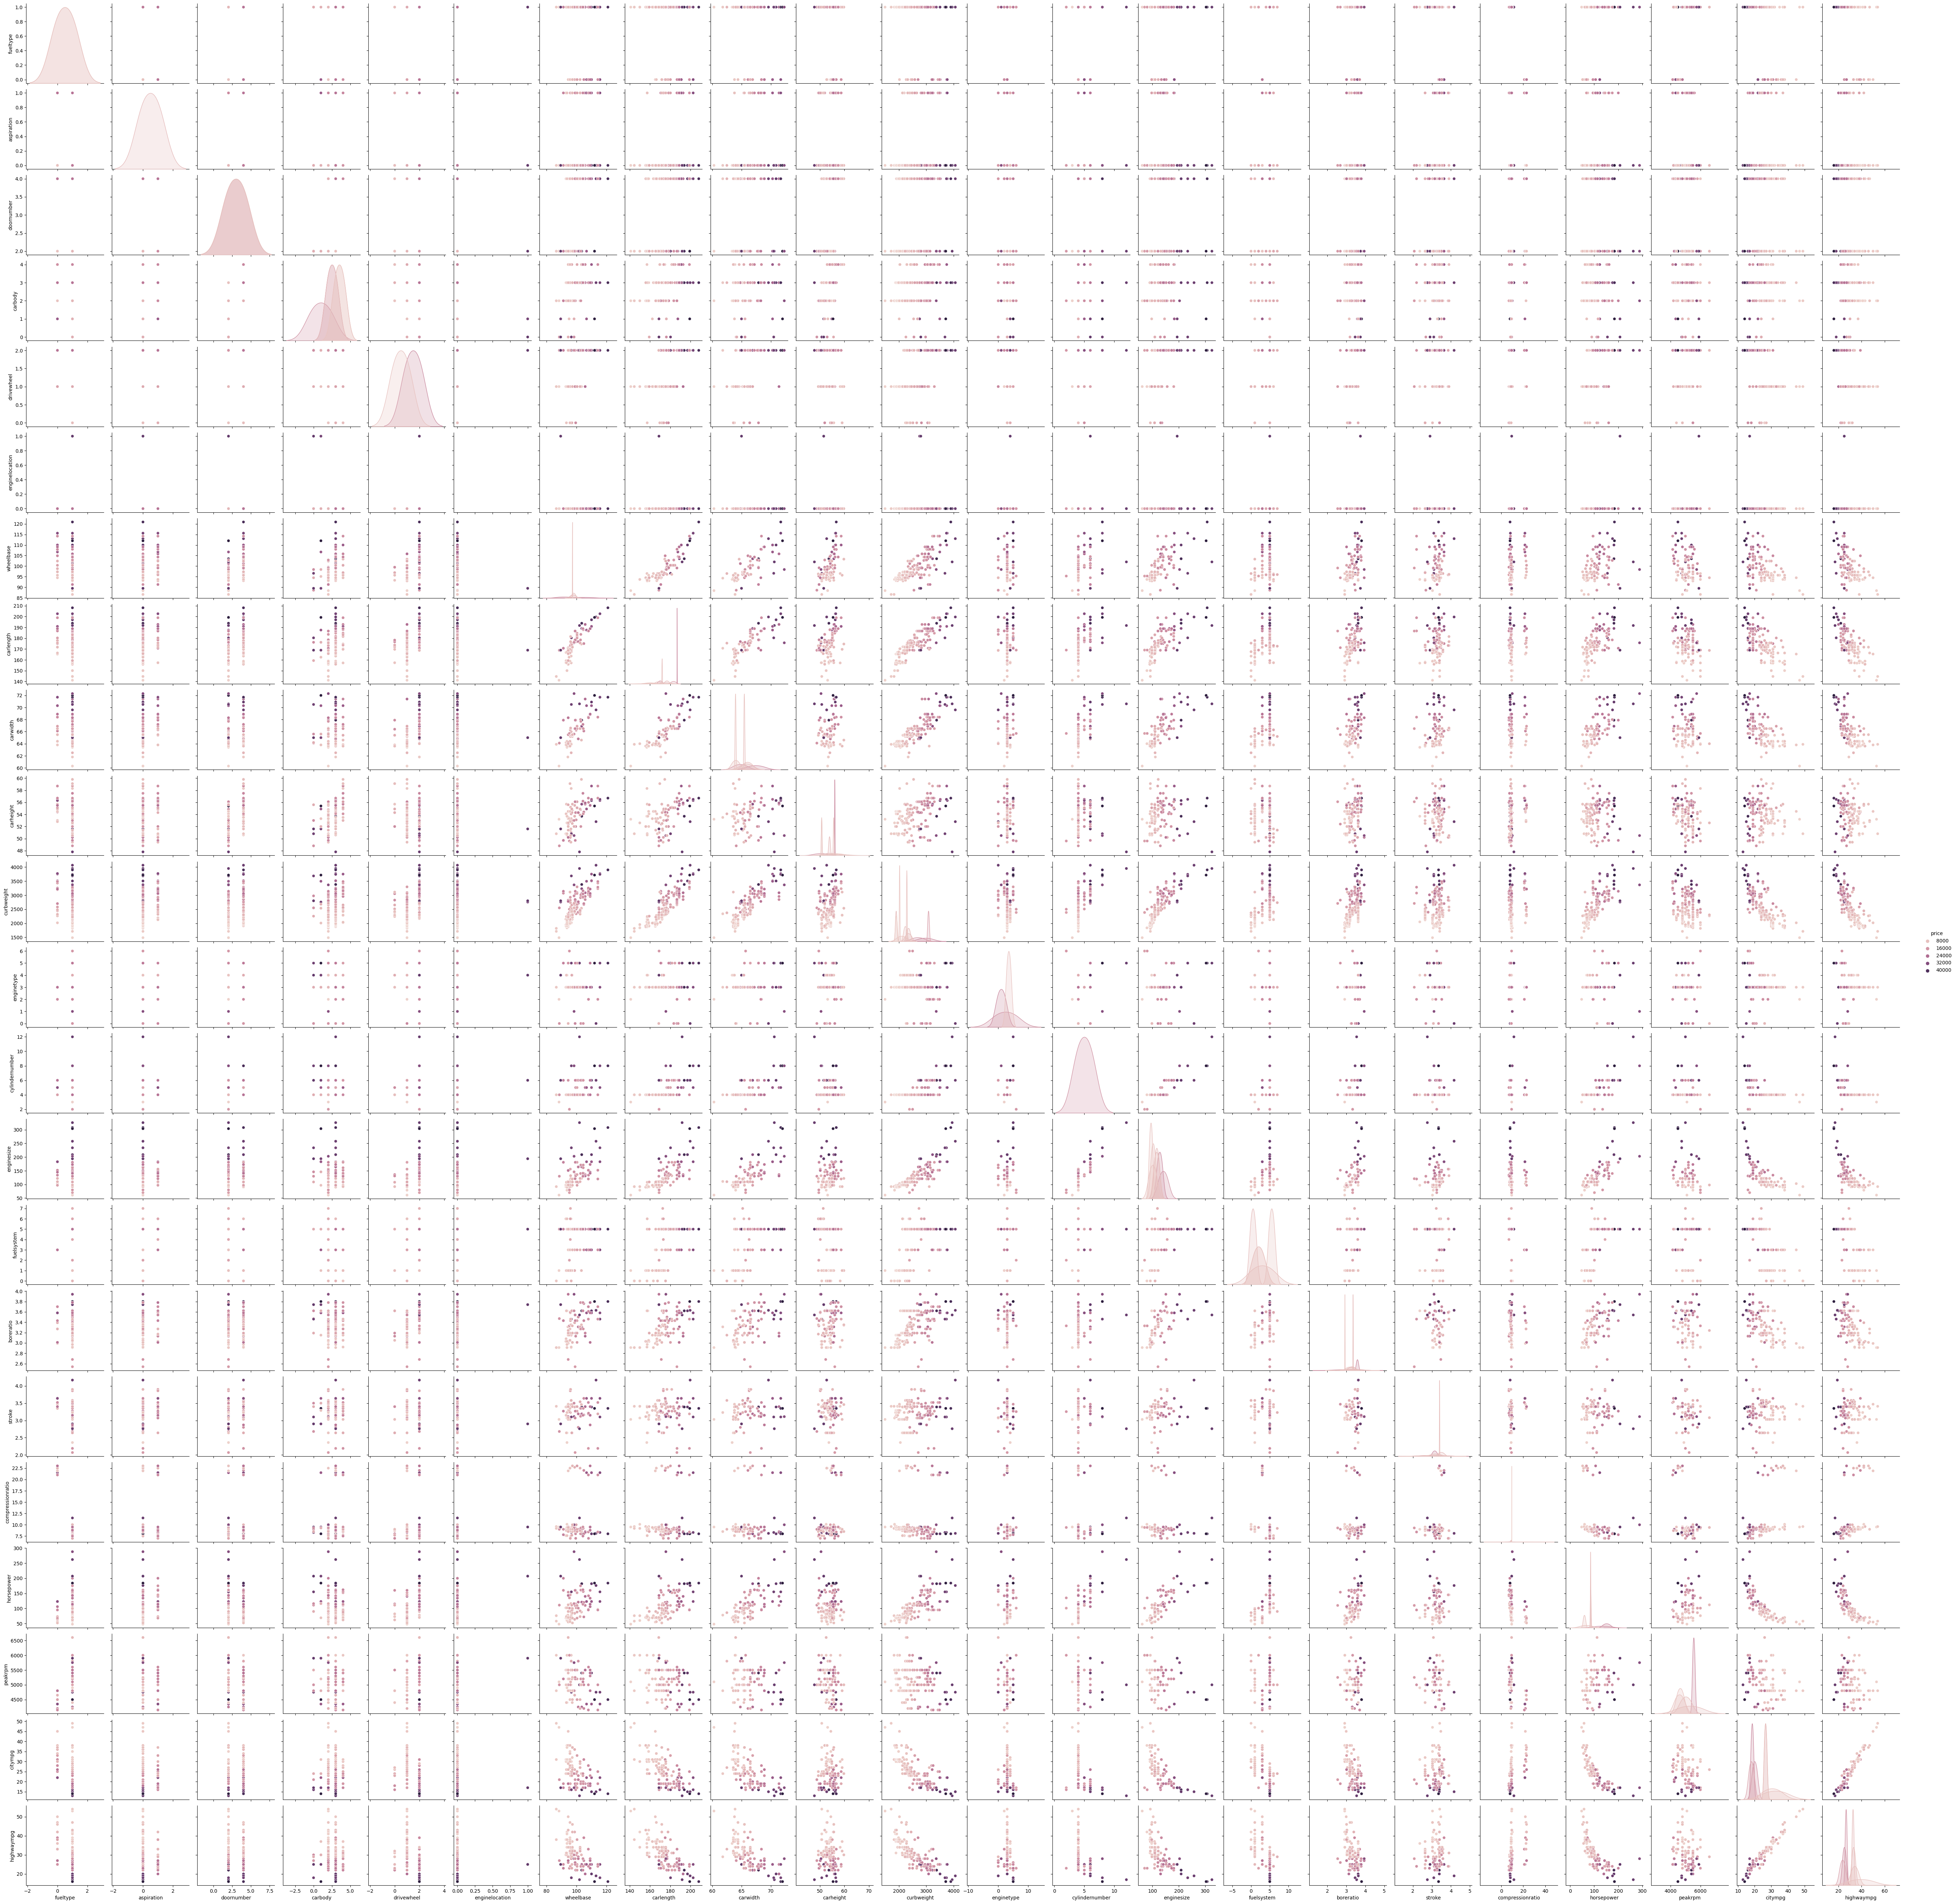

In [22]:
# Relationships between all pairs of variables in a dataset
sns.pairplot(df, hue='price')

In [ ]:
# Use a scatterplot to show the relationship between each and every column with price.

columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
           'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.4)

for i in range(14):
  plt.subplot(3,5,i+1)
  sns.scatterplot(x=df[columns[i]], y=df['price'], color='teal')

plt.show()

## **Split Data into Train and Test**

In [ ]:
# split the data into training and testing set

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print("X:",X_train.shape,X_test.shape)
print("y:",y_train.shape, y_test.shape)

## **Build a Model**

In [150]:
# Train a Random Forest Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## **Evaluate Model**

In [ ]:
# Evaluate the model using r2_score

from sklearn.metrics import mean_squared_error
accuracy = r2_score(y_test, y_pred)
print("R2score",accuracy)
